<a href="https://colab.research.google.com/github/babacar35/factoextra/blob/master/ADD_Comprehensive_PCA_with_R_using_FactoMineR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACP complète avec R utilisant FactoMineR

Dans ce cahier, j'aimerais faire une PCA sur un ensemble de données de pays. J'utiliserai le package FactoMineR, car je pense que c'est l'un des meilleurs packages pour les statistiques multidimensionnelles. Dans ce cahier, je serai particulièrement amené à interpréter les résultats plutôt que de simplement réduire les dimensions.
Je commencerai d'abord par une statistique descriptive, pour comprendre quelles sont les variables, comment elles interagissent entre elles puis je réaliserai l'ACP.

In [52]:
countries = read.csv('countries_of_the_world.csv', na.string = c("", "NA"))

In [53]:
# Let's check the head of the dataframe
head(countries)

,Country,Region,Population,Area..sq..mi..,Pop..Density..per.sq..mi..,Coastline..coast.area.ratio.,Net.migration,Infant.mortality..per.1000.births.,GDP....per.capita.,Literacy....,Phones..per.1000.,Arable....,Crops....,Other....,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
2,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
3,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
4,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000,"97,0","259,5",10,15,75,2,"22,46","3,27",NA,NA,NA
5,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NA,NA,NA
6,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900,"42,0","7,8","2,41","0,24","97,35",NA,"45,11","24,2","0,096","0,658","0,246"


# Description des données
Cet ensemble de données provient de Fernando Lasso, https://www.kaggle.com/fernandol/countries-of-the-world. Il s'agit de données compilées par le gouvernement américain entre 1970 et 2017. Elles comportent un total de vingt colonnes qui représentent des indicateurs économiques. Voici ces colonnes avec une brève description :
**Pays** : le nom du pays

**Région** : Dans quelle région se situe le pays : Afrique, Asie, Moyen-Orient, Amériques...

**Population** : la population du pays.

**Superficie** (mi²)

**Populaire. Densité (par mile carré)**

**Littoral (rapport côte/superficie)**

**Migration nette**

**Mortalité infantile (pour 1 000 naissances)**

**PIB ($ par habitant)**

**Alphabétisation (%)** : proportion de la population alphabétisée.

Téléphones (par 1000)

Arables (%)

Cultures (%)

Autre (%)

**Climat** : 1 - Tropical sec ou toundra et glace, classification B et E.
2- Tropical humide, classification A.
3- Subtropical tempéré humide et continental tempéré, classification Cfa, Cwa et D.
4- Des étés chauds et secs et des hivers humides.


Taux de natalité
Taux de mortalité
Agriculture
Industrie : la part de l'industrie dans l'économie
Service : une partie du service dans l'économie

# Descriptive statistics and Exploratory data analysis

In [54]:
# Checking for missing values
any(is.na(countries))

[1] TRUE

In [55]:
sum(is.na(countries))

[1] 110

In [56]:
# Nous avons un total de 110 valeurs manquantes. Essayons de voir où se trouvent ces valeurs manquantes

In [57]:
# prompt: installer library Amelia

#install.packages('Amelia')


In [58]:
library(Amelia)

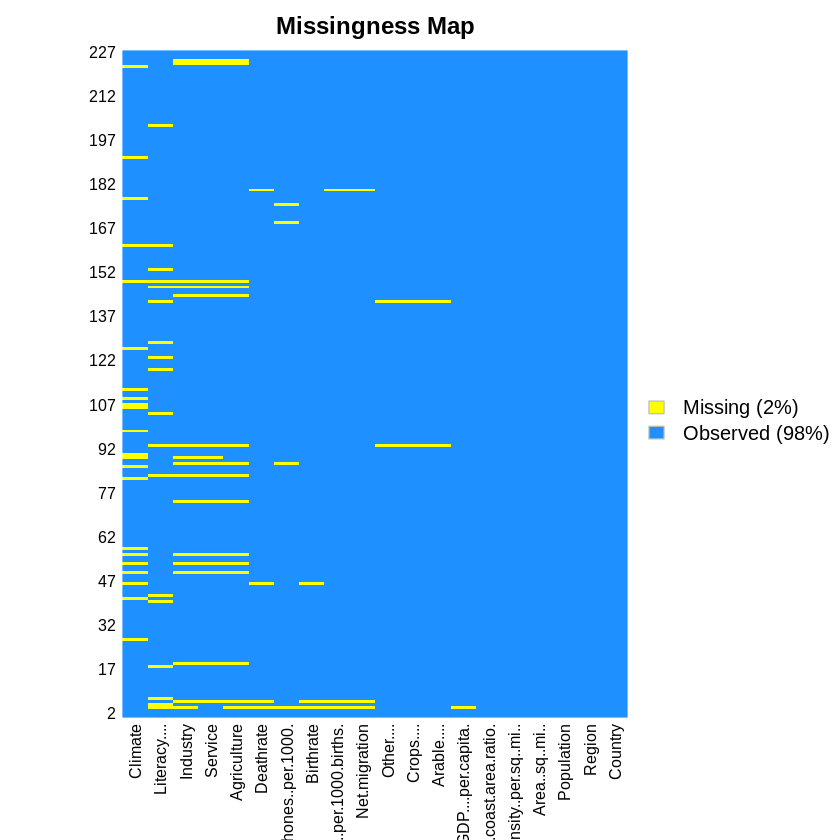

In [59]:
missmap(countries, legend = TRUE, col = c("yellow", "dodgerblue"))

Heureusement, toutes ces valeurs manquantes se trouvent dans des colonnes numériques. Pour faire court et aller directement à l'objet de ce carnet, je ne vais pas utiliser de méthodes de saisie particulières, je remplacerai ces valeurs manquantes par la moyenne de chaque colonne.
Mais d'abord, vérifions comment R considère ces colonnes comme étant

In [60]:
# The structure of our dataset : in order to see how R handles the data
str(countries)

'data.frame':	227 obs. of  20 variables:
 $ Country                           : chr  "Afghanistan " "Albania " "Algeria " "American Samoa " ...
 $ Region                            : chr  "ASIA (EX. NEAR EAST)         " "EASTERN EUROPE                     " "NORTHERN AFRICA                    " "OCEANIA                            " ...
 $ Population                        : int  31056997 3581655 32930091 57794 71201 12127071 13477 69108 39921833 2976372 ...
 $ Area..sq..mi..                    : int  647500 28748 2381740 199 468 1246700 102 443 2766890 29800 ...
 $ Pop..Density..per.sq..mi..        : chr  "48,0" "124,6" "13,8" "290,4" ...
 $ Coastline..coast.area.ratio.      : chr  "0,00" "1,26" "0,04" "58,29" ...
 $ Net.migration                     : chr  "23,06" "-4,93" "-0,39" "-20,71" ...
 $ Infant.mortality..per.1000.births.: chr  "163,07" "21,52" "31" "9,27" ...
 $ GDP....per.capita.                : int  700 4500 6000 8000 19000 1900 8600 11000 11200 3500 ...
 $ Literacy....   

1. Il semble que R considère la plupart des colonnes comme facteur (catégorique). Ce n’est pas vrai car bon nombre de nos données sont des colonnes numériques. Convertissons ces facteurs en données numériques, afin de préparer les données pour l'ACP.

In [61]:
head(as.character(countries$Agriculture))

[1] "0,38"  "0,232" "0,101" NA      NA      "0,096"

**Remarque** : Les nombres flottants ne sont pas au format accepté par R. C'est une virgule ',' au lieu d'un point. 0,38 est différent de 0,38.
Nous devons les convertir dans un format approprié.

In [62]:
# Since Country and Region are not numeric, we'll start converting from the 3rd column
for (i in 3:length(names(countries))){
    countries[,i] <- as.numeric(gsub(",",'.',(sapply(countries[,i], as.character))))
}

In [63]:
str(countries) # Now we're done! All of our columns are now properly read by R

'data.frame':	227 obs. of  20 variables:
 $ Country                           : chr  "Afghanistan " "Albania " "Algeria " "American Samoa " ...
 $ Region                            : chr  "ASIA (EX. NEAR EAST)         " "EASTERN EUROPE                     " "NORTHERN AFRICA                    " "OCEANIA                            " ...
 $ Population                        : num  31056997 3581655 32930091 57794 71201 ...
 $ Area..sq..mi..                    : num  647500 28748 2381740 199 468 ...
 $ Pop..Density..per.sq..mi..        : num  48 124.6 13.8 290.4 152.1 ...
 $ Coastline..coast.area.ratio.      : num  0 1.26 0.04 58.29 0 ...
 $ Net.migration                     : num  23.06 -4.93 -0.39 -20.71 6.6 ...
 $ Infant.mortality..per.1000.births.: num  163.07 21.52 31 9.27 4.05 ...
 $ GDP....per.capita.                : num  700 4500 6000 8000 19000 1900 8600 11000 11200 3500 ...
 $ Literacy....                      : num  36 86.5 70 97 100 42 95 89 97.1 98.6 ...
 $ Phones..per.1000. 

**Remarque** : Le climat est une variable catégorielle : nous ne pouvons pas imputer la moyenne. Nous allons convertir le NA en Inconnu comme facteur, ce sera une fonctionnalité de la colonne Climat, cela signifie non disponible.

In [64]:
countries$Climate = ifelse(is.na(countries$Climate), 'Unknown', countries$Climate)
countries$Climate = as.factor(countries$Climate)

In [65]:
num_cols = c(3:20)
num_cols = num_cols[num_cols != 15]
# Since the 15th column is also categorical, we exclude it
for (index in num_cols)
{countries[,index] = ifelse(is.na(countries[,index]),ave(countries[,index],
                    FUN =function(x) mean(x, na.rm=TRUE)), countries[,index]) }

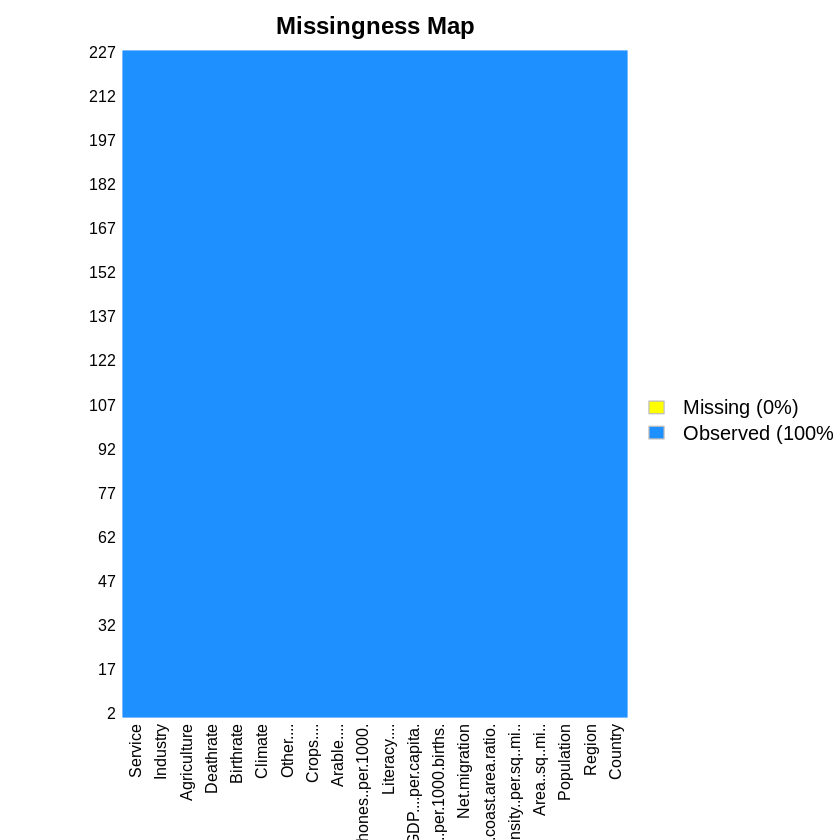

In [66]:
missmap(countries, legend = TRUE, col = c("yellow", "dodgerblue"))

In [67]:
# prompt: installer FactoMineR

#install.packages('FactoMineR')


# L'analyse en composantes principales
L'analyse en composantes principales est une méthode que nous utilisons pour expliquer la variance entre les individus de notre ensemble de données. Elle est surtout connue comme technique de réduction de dimensionnalité.

Nous avons réussi à supprimer les données manquantes. Passons maintenant au PCA

In [79]:
# We'll import the FactoMineR packages
library(FactoMineR)

In [80]:
# We'll store the results of the PCA in the object called res
res = PCA(countries, scale.unit = TRUE, quali.sup = c(1,2,15), ncp = 5, graph = T)

L'argument scale.unit est utilisé pour mettre à l'échelle les données, puisque nous avons de grandes disparités entre les variables, nous devons les mettre à l'échelle afin de minimiser la somme des carrés derrière la scène.
ncp est pour le nombre maximum de composants.
Nous choisissons les variables Climat et Région comme variables illustratives. Ils ne seront pas inclus dans l’ACP mais ils aideront à l’interprétation. Leurs positions d'index sont 2 et 15.

In [81]:
# If we display the content of res, we'll get this
res

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 227 individuals, described by 20 variables
*The results are available in the following objects:

   name                description                                          
1  "$eig"              "eigenvalues"                                        
2  "$var"              "results for the variables"                          
3  "$var$coord"        "coord. for the variables"                           
4  "$var$cor"          "correlations variables - dimensions"                
5  "$var$cos2"         "cos2 for the variables"                             
6  "$var$contrib"      "contributions of the variables"                     
7  "$ind"              "results for the individuals"                        
8  "$ind$coord"        "coord. for the individuals"                         
9  "$ind$cos2"         "cos2 for the individuals"                           
10 "$ind$contrib"      "contributions of the ind

C’est essentiellement là que sont stockés les résultats de l’ACP. Nous pouvons le résumer afin d’interpréter les résultats

In [82]:
summary(res)


Call:
PCA(X = countries, scale.unit = TRUE, ncp = 5, quali.sup = c(1,  
     2, 15), graph = T) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               5.200   2.423   1.825   1.485   1.280   1.009   0.785
% of var.             30.587  14.250  10.734   8.734   7.529   5.936   4.618
Cumulative % of var.  30.587  44.837  55.572  64.306  71.835  77.771  82.389
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.696   0.562   0.516   0.416   0.387   0.192   0.137
% of var.              4.094   3.308   3.036   2.445   2.274   1.131   0.807
Cumulative % of var.  86.482  89.790  92.826  95.271  97.545  98.676  99.483
                      Dim.15  Dim.16  Dim.17
Variance               0.085   0.002   0.000
% of var.              0.502   0.015   0.000
Cumulative % of var.  99.985 100.000 100.000

Individuals (the 10 first)
                                       Dist    Dim.1    ctr   co

C’est la partie la plus excitante.

Selon la règle de Kaiser, nous devons sélectionner toutes les dimensions qui ont une valeur propre > 1. Théoriquement, nous pouvons sélectionner jusqu'à la 5ème dimension car elles ont une valeur propre supérieure à 1.

Mais comme le but de l’ACP est de réduire la dimension afin d’expliquer la variance au sein de la population, nous n’interpréterons que les deux premières dimensions. Ils expliquent tous deux environ 45 % de la variance totale. Mais nous pouvons aussi voir ce qui se passe dans les autres dimensions.

In [72]:
res$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,5.199798e+00,3.058704e+01,30.58704
comp 2,2.422569e+00,1.425041e+01,44.83745
comp 3,1.824847e+00,1.073439e+01,55.57184
comp 4,1.484760e+00,8.733881e+00,64.30572
comp 5,1.279901e+00,7.528831e+00,71.83455
comp 6,1.009175e+00,5.936326e+00,77.77088
comp 7,7.850656e-01,4.618033e+00,82.38891
comp 8,6.959031e-01,4.093547e+00,86.48246
comp 9,5.623432e-01,3.307901e+00,89.79036
comp 10,5.161298e-01,3.036058e+00,92.82642


In [73]:
# help(plot.PCA)

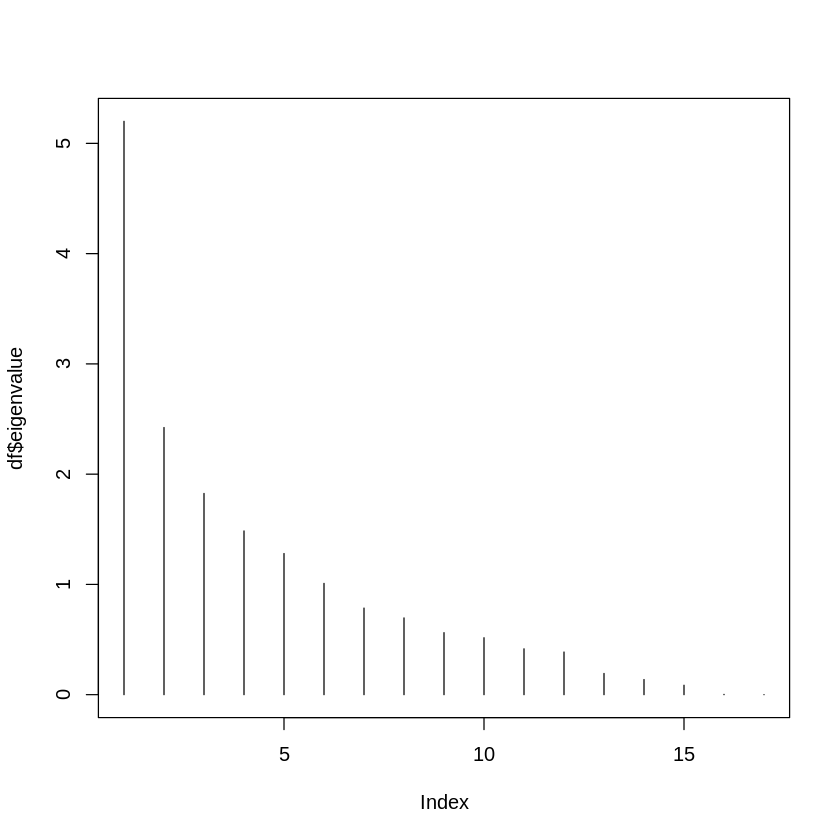

In [74]:
df = data.frame(res$eig)
plot(df$eigenvalue, type = 'h')

En général on arrête de choisir les dimensions lorsque la diminution de la valeur propre devient régulière.

Warning message in plot.PCA(res, axes = c(1, 2), choix = "var", habillage = 2):
“Habillage must be in c('contrib','cos2','none')”


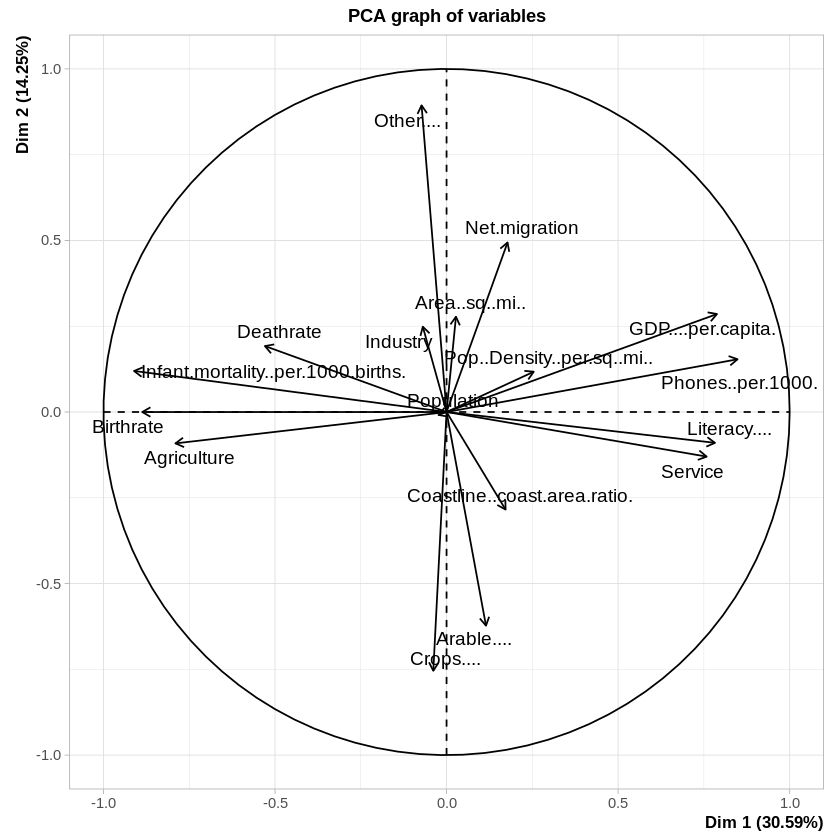

In [75]:
# Now let's plot the Variable factor map
plot.PCA(res, axes=c(1, 2), choix="var", habillage=2)

La carte factorielle des variables présente une vue de la projection des variables observées projetées dans le plan engendré par les deux premières composantes principales. Cela nous montre la relation structurelle entre les variables et les composants et nous aide à nommer les composants. La projection d'un vecteur variable sur l'axe de la composante permet de lire directement la corrélation entre la variable et la composante.

**La première dimension**

L’idée derrière ce graphique est de montrer dans quelle direction les variables sont corrélées. L'axe qui représente Dim 1 et Dim 2 est le coefficient de corrélation de Pearson qui va de - 1 à 1. On le lit de gauche à droite.
A titre d'exemple on voit ici que le PIB et les téléphones ont une forte corrélation sur la première dimension (autour de 0,8). Dans le même temps, l’agriculture, la natalité et la mortalité sont en corrélation négative avec ces axes.

Cela peut clairement nous donner un indice : un PIB par habitant fort est fortement corrélé positivement au téléphone mais très négativement à l’agriculture et au taux de natalité.

**Deuxième dimension**

Nous lisons la corrélation de bas en haut.

L’immigration nette présente une corrélation positive relativement élevée avec cette dimension. La variable avec la plus grande corrélation est « Autre » et les plus faibles sont les cultures et les terres arables.

In [76]:
res

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 227 individuals, described by 20 variables
*The results are available in the following objects:

   name                description                                          
1  "$eig"              "eigenvalues"                                        
2  "$var"              "results for the variables"                          
3  "$var$coord"        "coord. for the variables"                           
4  "$var$cor"          "correlations variables - dimensions"                
5  "$var$cos2"         "cos2 for the variables"                             
6  "$var$contrib"      "contributions of the variables"                     
7  "$ind"              "results for the individuals"                        
8  "$ind$coord"        "coord. for the individuals"                         
9  "$ind$cos2"         "cos2 for the individuals"                           
10 "$ind$contrib"      "contributions of the ind

In [98]:
res$var$contrib

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Population,0.01059666,3.034350e-03,19.619806561,0.90815098,31.52629570
Area..sq..mi..,0.01442605,3.184049e+00,13.725806128,0.01815887,32.31310265
Pop..Density..per.sq..mi..,1.24148321,5.694258e-01,7.298486531,1.91438403,4.70237933
Coastline..coast.area.ratio.,0.56862344,3.336040e+00,13.532283969,2.94797467,13.18014757
Net.migration,0.60756725,1.007620e+01,0.059925946,15.30558044,0.43986709
Infant.mortality..per.1000.births.,15.95795620,5.903935e-01,0.176690723,2.62241546,0.03811537
GDP....per.capita.,11.94338896,3.366410e+00,0.001195111,3.72842785,0.27644964
Literacy....,11.77034429,3.337063e-01,0.765478536,2.82245600,0.54464593
Phones..per.1000.,13.82899480,9.750455e-01,0.293611617,3.21444631,0.10293216
Arable....,0.25375919,1.600561e+01,11.854829651,17.38382542,3.15753961


Ce dataframe nous donne la contribution de chaque variable dans la construction des dimensions.

Les variables qui contribuent à définir l'axe 1 sont l'agriculture, les services, les téléphones pour 1000, la mortalité infantile, l'alphabétisation et le PIB/habitant. La somme de toutes les contributions doit être de 100.

Sur le deuxième axe, ce sont le littoral variable, l'immigration nette, l'industrie et autres qui contribuent le plus.

In [102]:
#dimdesc(res, axes = 1:2)


# Hierarchical clustering

Now let's say we want to understand how are the individuals are affected by these variables. We want now to create clusters to gather together the countries which present similarity and on what basis.

In [84]:
res.hcpc<-HCPC(res ,nb.clust=4,consol=TRUE,min=4,max=10,graph=TRUE)
# I choose to divide the countries in 4 cluster in order to see which countries go together

In [85]:
help(plot.HCPC)

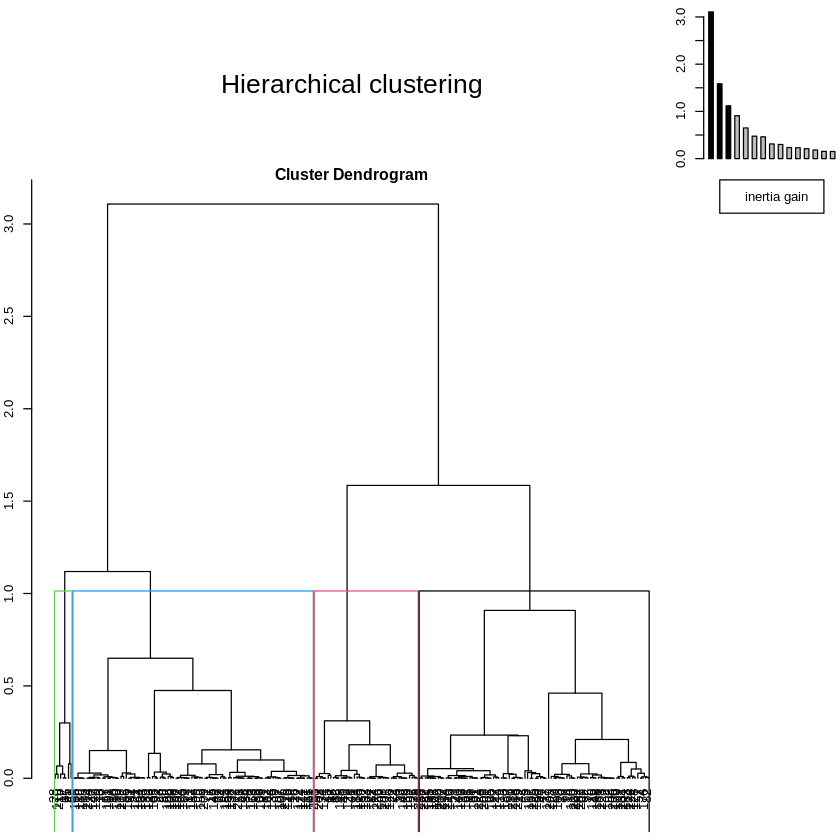

In [86]:
plot.HCPC(res.hcpc, choice = 'tree', ind.names = F)

Depuis que j'ai décidé de diviser les pays en 4 clusters : Ce graphique montre la proportion de chaque pays dans les différents clusters. Nous aurions évidemment pu fusionner les clusters vert et bleu car le vert ne compte pas trop de pays. Mais nous le garderons tel quel.

In [87]:
res.hcpc$desc.var

Link between the cluster variable and the categorical variables (chi-square test)
=================================================================================
             p.value df
Region  4.318832e-32 30
Climate 4.763335e-08 18

Description of each cluster by the categories
=============================================
$`1`
                                             Cla/Mod   Mod/Cla    Global
Region=SUB-SAHARAN AFRICA                  78.431373 75.471698 22.466960
Climate=Climate_2                          31.531532 66.037736 48.898678
Region=EASTERN EUROPE                       0.000000  0.000000  5.286344
Region=WESTERN EUROPE                       0.000000  0.000000 12.334802
Climate=Climate_3                           4.166667  3.773585 21.145374
Region=LATIN AMER. & CARIB                  2.222222  1.886792 19.823789
                                                p.value    v.test
Region=SUB-SAHARAN AFRICA                  3.349460e-23  9.921716
Climate=Climate_2                          4.635364e-03  2.831338
Region=EASTERN EUROPE                      3.751916e-02 -2.080070
Region=WESTERN EUROPE                      3.337638e-04 -3.587578
Climate=Climate_3                          1.091659e-04 -3.869261
Region=LATIN AMER. & CARIB                 2.691977e-05 -4.198071

$`2`
                                             Cla/Mod   Mod/Cla    Global
Region=LATIN AMER. & CARIB                  62.22222 29.787234 19.823789
Region=NORTHERN AFRICA                     100.00000  6.382979  2.643172
Climate=Climate_1                           62.06897 19.148936 12.775330
Region=C.W. OF IND. STATES                  75.00000  9.574468  5.286344
Region=NEAR EAST                            68.75000 11.702128  7.048458
Region=SUB-SAHARAN AFRICA                   17.64706  9.574468 22.466960
Region=WESTERN EUROPE                        0.00000  0.000000 12.334802
                                                p.value    v.test
Region=LATIN AMER. & CARIB                 1.900139e-03  3.105412
Region=NORTHERN AFRICA                     4.579835e-03  2.835191
Climate=Climate_1                          1.843826e-02  2.356697
Region=C.W. OF IND. STATES                 2.014684e-02  2.323602
Region=NEAR EAST                           2.655889e-02  2.217940
Region=SUB-SAHARAN AFRICA                  6.098568e-05 -4.008964
Region=WESTERN EUROPE                      8.394196e-08 -5.358444

$`3`
                                           Cla/Mod  Mod/Cla    Global
Region=NORTHERN AMERICA                         40 33.33333 2.2026432
Country=United States                          100 16.66667 0.4405286
Country=Russia                                 100 16.66667 0.4405286
Country=India                                  100 16.66667 0.4405286
Country=China                                  100 16.66667 0.4405286
Country=Canada                                 100 16.66667 0.4405286
Country=Brazil                                 100 16.66667 0.4405286
                                               p.value   v.test
Region=NORTHERN AMERICA                    0.005743768 2.762061
Country=United States                      0.026431718 2.219809
Country=Russia                             0.026431718 2.219809
Country=India                              0.026431718 2.219809
Country=China                              0.026431718 2.219809
Country=Canada                             0.026431718 2.219809
Country=Brazil                             0.026431718 2.219809

$`4`
                                              Cla/Mod   Mod/Cla    Global
Region=WESTERN EUROPE                      100.000000 37.837838 12.334802
Climate=Climate_3                           64.583333 41.891892 21.145374
Region=BALTICS                             100.000000  4.054054  1.321586
Climate=Climate_1.5                          0.000000  0.000000  3.524229
Climate=Climate_1                           10.344828  4.054054 12.775330
Climate=Climate_2                           23.

**Cluster 1** : Les caractéristiques communes à ces pays sont : un taux agricole élevé, une mortalité infantile élevée, un taux de natalité et un taux de mortalité élevés.

Ils ont tous en commun une faible industrie, un faible PIB par habitant, une faible proportion de détenteurs de téléphone et un faible taux d'alphabétisation.

**Cluster 2** : Les pays de ce cluster partagent en commun une industrialisation et un taux de natalité relativement élevés, mais ils ont une immigration nette moindre, un PIB moindre...

**Cluster 3** : Les pays de ce cluster partagent en commun une très grande superficie et une très forte population. Ils ont également un PIB par habitant et une proportion de téléphones relativement élevés.

**Cluster 4** : Les pays de ce cluster ont une proportion de téléphone pour 1000 habitants très élevée avec un PIB par habitant très élevé. La part du service dans l’économie est supérieure à la moyenne globale. Ils ont également un taux d’alphabétisation élevé.
Ils ont une industrie inférieure à la moyenne globale, moins d'agriculture, moins de natalité et de mortalité infantile.

In [88]:
# Let's see which countries are in which clusters
cluster = data.frame(res.hcpc$data.clust)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [90]:
head(cluster)

,Country,Region,Population,Area..sq..mi..,Pop..Density..per.sq..mi..,Coastline..coast.area.ratio.,Net.migration,Infant.mortality..per.1000.births.,GDP....per.capita.,Literacy....,⋯,Arable....,Crops....,Other....,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clust
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700,36.0,⋯,12.13,0.22,87.65,Climate_1,46.60,20.34,0.3800000,0.2400000,0.380000,1
2,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500,86.5,⋯,21.09,4.42,74.49,Climate_3,15.11,5.22,0.2320000,0.1880000,0.579000,2
3,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000,70.0,⋯,3.22,0.25,96.53,Climate_1,17.14,4.61,0.1010000,0.6000000,0.298000,2
4,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000,97.0,⋯,10.00,15.00,75.00,Climate_2,22.46,3.27,0.1508443,0.2827109,0.565283,2
5,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000,100.0,⋯,2.22,0.00,97.78,Climate_3,8.71,6.25,0.1508443,0.2827109,0.565283,4
6,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900,42.0,⋯,2.41,0.24,97.35,Climate_Unknown,45.11,24.20,0.0960000,0.6580000,0.246000,1


In [91]:
cluster %>% group_by(clust) %>% summarize(Total_Countries = n())

clust,Total_Countries
<fct>,<int>
1,53
2,94
3,6
4,74


In [92]:
cluster = cluster %>% arrange(by = clust)
cluster[,c('Country', 'clust')]

Country,clust
<fct>,<fct>
Afghanistan,1
Angola,1
Bangladesh,1
Benin,1
Bhutan,1
Botswana,1
Burkina Faso,1
Burma,1
Burundi,1


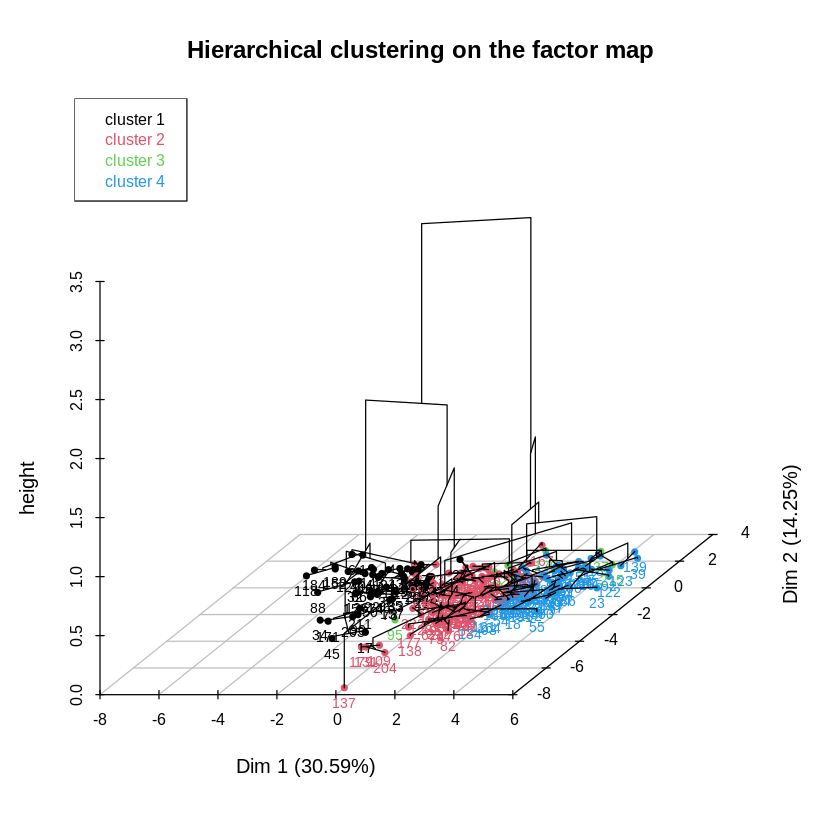

In [93]:
plot.HCPC(res.hcpc, axes = 1:2)

In [94]:
df = data.frame(res.hcpc$call$X)
head(df)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,clust
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
118,-6.030281,0.8968411,-1.5402495,1.9771110,0.4218002,1
184,-6.004205,1.3319730,-0.5304170,1.2636678,-0.2594869,1
189,-5.452586,1.5963044,-1.5034654,1.7919220,0.6359090,1
6,-5.395421,2.5036958,1.0311855,-0.3314996,-0.8679051,1
152,-5.346937,1.4163410,-1.1462500,1.5842756,0.6499661,1
1,-5.000564,2.4554476,-0.6001591,3.5634204,-0.1727132,1


In [95]:
library(ggplot2)

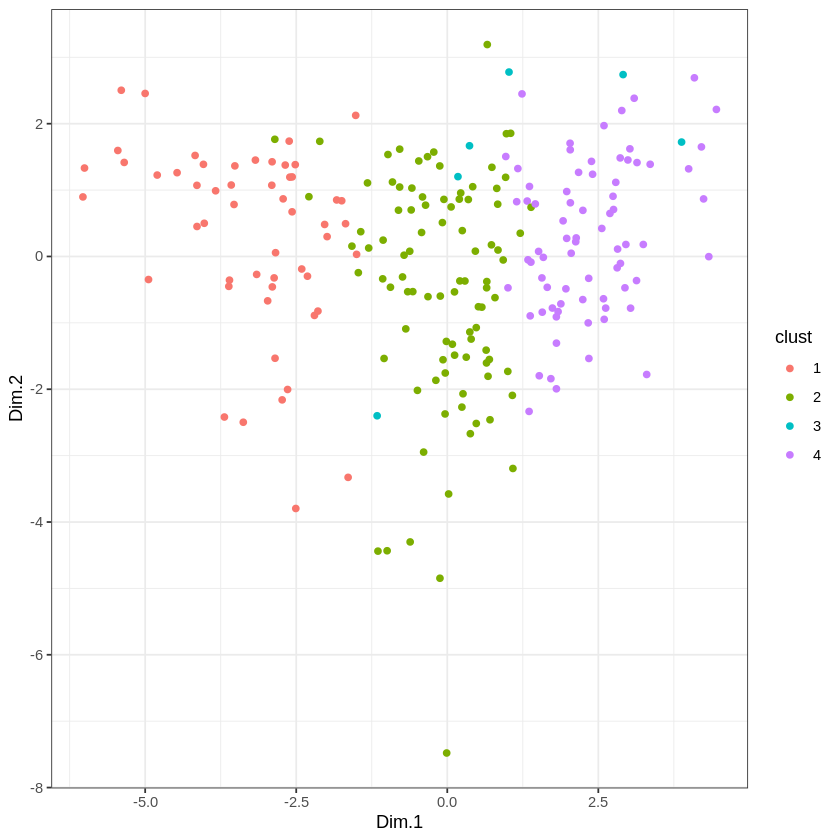

In [96]:
ggplot(df, aes(Dim.1, Dim.2))+geom_point(aes(col = clust))+theme_bw()

Ce graphique montre à quel point les pays sont différents selon le premier et le deuxième axes.
Rappelez-vous comme nous l’avons vu précédemment : plus un pays tend vers la droite sur Dim1, plus sa corrélation avec un PIB/habitant élevé, un taux d’alphabétisation élevé, une faible mortalité infantile, etc. est élevée.

Plus un pays a tendance à monter sur l'axe Dim2, plus la corrélation avec une part importante de l'industrie dans l'économie, des récoltes élevées, etc. est élevée...

Tous ces résultats doivent être interprétés avec une certaine distance car les deux dimensions que nous interprétons n'expliquent qu'environ 45 % de la variance entre les pays. J'ai décidé de ne pas interpréter l'autre axe car le gain d'inertie marginal est plus lent.

Mais nous pouvons clairement voir que cela contribue à expliquer les écarts entre les pays. Il est plus facile d’interpréter les résultats lorsque l’on sait ce que représente une seule variable. Dans cet exemple, je n'ai pas trouvé d'informations pertinentes sur la signification de la colonne "Autre" donc je n'ai pas pu l'interpréter. Il serait peut-être beaucoup plus logique de l'omettre.

J'espère vraiment que cela aidera !!